#**LOAD DATASET**

In [5]:
# Load the dataset
import pandas as pd
data = pd.read_csv('/content/SY-2020-2021-Masterlist-of-Schools-Address-only-1-1 (1).csv')

In [6]:
# Display the first 10 rows
data.head(10)

,Region,Division,District,BEIS School ID,School Name,Street Address,Municipality,Legislative District,Barangay,Sector,Urban/Rural,School Subclassification,Modified Curricural Offering Classification
0,Region I,Ilocos Norte,Bacarra I,100001,Apaleng-Libtong ES,"Brgy. 21, Libtong, Bacarra, Ilocos Norte",BACARRA,1st District,LIBTONG,Public,Partially Urban,DepED Managed,Purely ES
1,Region I,Ilocos Norte,Bacarra I,100002,Bacarra CES,Santa Rita,BACARRA,1st District,SANTA RITA (POB.),Public,Partially Urban,DepED Managed,Purely ES
2,Region I,Ilocos Norte,Bacarra I,100003,Buyon ES,NONE,BACARRA,1st District,BUYON,Public,Partially Urban,DepED Managed,Purely ES
3,Region I,Ilocos Norte,Bacarra I,100004,Ganagan Elementary School,"#37 Ganagan,Bacarra, Ilocos Norte",BACARRA,1st District,GANAGAN,Public,Partially Urban,DepED Managed,Purely ES
4,Region I,Ilocos Norte,Bacarra I,100005,Macupit ES,Macupit,BACARRA,1st District,MACUPIT,Public,Partially Urban,DepED Managed,Purely ES
5,Region I,Ilocos Norte,Bacarra I,100006,Nambaran ES,Brgy. 19 Nambaran,BACARRA,1st District,NAMBARAN,Public,Partially Urban,DepED Managed,Purely ES
6,Region I,Ilocos Norte,Bacarra I,100007,Pasiocan ES,"Brgy 39, Bacarra, I.N.",BACARRA,1st District,PASIOCAN,Public,Partially Urban,DepED Managed,Purely ES
7,Region I,Ilocos Norte,Bacarra I,100008,Pulangi ES,"-Brgy. 20, Pulangi",BACARRA,1st District,PULANGI,Public,Partially Urban,DepED Managed,Purely ES
8,Region I,Ilocos Norte,Bacarra I,100009,Sabas-Sagisi Memorial Elem. School,"Brgy. 38, Sangil, Bacarra, Ilocos Norte",BACARRA,1st District,SANGIL,Public,Partially Urban,DepED Managed,Purely ES
9,Region I,Ilocos Norte,Bacarra I,100010,SPECIAL EDUCATION CENTER,RIZAL ST.,BACARRA,1st District,SANTA RITA (POB.),Public,Partially Urban,DepED Managed,Purely ES


#**PRE PROCESSING**

DATA REDUCTION

In [7]:
import pandas as pd

# Load the dataset to ensure 'data' is defined
data = pd.read_csv('/content/SY-2020-2021-Masterlist-of-Schools-Address-only-1-1 (1).csv')

# --- Clean column names ---
data.columns = data.columns.str.strip()

# --- Specify the columns you want to retain ---
keep_cols = ['Barangay', 'Sector', 'Legislative District', 'Urban/Rural']

# --- Keep only the columns that exist in the DataFrame ---
data = data[[c for c in keep_cols if c in data.columns]]

data.head(10)

,Barangay,Sector,Legislative District,Urban/Rural
0,LIBTONG,Public,1st District,Partially Urban
1,SANTA RITA (POB.),Public,1st District,Partially Urban
2,BUYON,Public,1st District,Partially Urban
3,GANAGAN,Public,1st District,Partially Urban
4,MACUPIT,Public,1st District,Partially Urban
5,NAMBARAN,Public,1st District,Partially Urban
6,PASIOCAN,Public,1st District,Partially Urban
7,PULANGI,Public,1st District,Partially Urban
8,SANGIL,Public,1st District,Partially Urban
9,SANTA RITA (POB.),Public,1st District,Partially Urban


HANDLE MISSING VALUE

In [8]:
# --- Check for missing values in reduced columns ---
missing_values = data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Barangay                51
Sector                   0
Legislative District     0
Urban/Rural              0
dtype: int64


In [9]:
# Fill missing values with the most frequent (mode) value
data['Sector'] = data['Sector'].fillna(data['Sector'].mode()[0])
data['Barangay'] = data['Barangay'].fillna(data['Barangay'].mode()[0])
data['Urban/Rural'] = data['Urban/Rural'].fillna(data['Urban/Rural'].mode()[0])
data['Legislative District'] = data['Legislative District'].fillna(
    data['Legislative District'].mode()[0]
)


In [10]:
# --- Check for missing values after fillna ---
missing_values_after_fillna = data.isnull().sum()

print("Missing values in each column after fillna:")
print(missing_values_after_fillna)

Missing values in each column after fillna:
Barangay                0
Sector                  0
Legislative District    0
Urban/Rural             0
dtype: int64


LABEL ENCODING

In [38]:
from sklearn.preprocessing import LabelEncoder

# Clean column names
data.columns = data.columns.str.strip()

# -----------------------------------------
# Convert boolean columns to 1 / 0
# -----------------------------------------
bool_cols = data.select_dtypes(include=["bool"]).columns
for col in bool_cols:
    data[col] = data[col].astype(int)

# Dictionary to store encoders
encoders = {}

# -----------------------------------------
# Encode object (categorical) columns
# -----------------------------------------
for col in data.select_dtypes(include=["object"]).columns:

    # Manual encoding ONLY for Urban/Rural
    if col == "Urban/Rural":
        data[col] = (
            data[col]
            .str.strip()
            .str.lower()
            .map({
                "rural": 0,
                "partially": 1,
                "partially urban": 1,
                "semi-urban": 1,
                "urban": 2
            })
        )

        print(f"\nMapping for column: {col}")
        print("  rural -> 0")
        print("  partially / semi-urban -> 1")
        print("  urban -> 2")
        continue

    # Default Label Encoding (includes Legislative District)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le

    print(f"\nMapping for column: {col}")
    for original, encoded in zip(le.classes_, range(len(le.classes_))):
        print(f"  {original} -> {encoded}")

# Save encoded dataset
data.to_csv("SY 2020-2021 Masterlist of Schools Address.csv", index=False)

print("\nFinal encoded dataframe:")
print(data)

data.info(10)


Final encoded dataframe:
       Barangay  Sector  Legislative District  Urban/Rural
0         11520       1                     0            1
1         19225       1                     0            1
2          4554       1                     0            1
3          8622       1                     0            1
4         12563       1                     0            1
...         ...     ...                   ...          ...
60919     17811       0                     7            2
60920       338       0                     7            2
60921       338       0                     7            2
60922     20068       0                     7            2
60923       338       0                     7            2

[60924 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60924 entries, 0 to 60923
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Barangay              60924 n

TRAIN TEST SPLIT

In [12]:
# Getting Inputs (X) and Outputs (Y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [13]:
X

array([[11520,     1,     0],
       [19225,     1,     0],
       [ 4554,     1,     0],
       ...,
       [  338,     0,     7],
       [20068,     0,     7],
       [  338,     0,     7]])

In [14]:
y

array([1, 1, 1, ..., 2, 2, 2])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=0
)

In [16]:
X_train

array([[19166,     1,     7],
       [13250,     1,     7],
       [11747,     1,     0],
       ...,
       [20980,     0,     0],
       [18718,     1,     0],
       [18904,     1,     5]])

In [17]:
X_test

array([[  683,     1,     1],
       [ 2673,     0,     7],
       [12684,     1,     1],
       ...,
       [ 4259,     0,     0],
       [16256,     1,     0],
       [22640,     1,     1]])

In [18]:
y_train


array([1, 1, 1, ..., 1, 1, 1])

In [19]:
y_test

array([1, 2, 1, ..., 2, 0, 1])

FEATURE SCALING

In [20]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit ONLY on training data, then transform both training and test sets
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

MACHINE LEARNING

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [22]:
import numpy as np
import pandas as pd

# Impute NaN values in y_train and y_test with their respective modes
# Calculate mode, handling potential empty mode result if all values are NaN
mode_y_train = pd.Series(y_train).mode()[0] if not pd.Series(y_train).isnull().all() else 0
mode_y_test = pd.Series(y_test).mode()[0] if not pd.Series(y_test).isnull().all() else 0

y_train = np.nan_to_num(y_train, nan=mode_y_train)
y_test = np.nan_to_num(y_test, nan=mode_y_test)

model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
# Making the predictons of the data points in the test set
y_pred = model.predict(X_test)

In [24]:
y_pred

array([1, 2, 1, ..., 1, 1, 1])

PREDICTION MAKING

In [25]:
model.predict(sc.transform([[35, 467, 2]]))

array([0])

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[   0,  574,    7],
       [   0, 9252,  271],
       [   0, 1717,  364]])

ACCURACY

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7891670086171523

PRECISION

In [28]:
import numpy as np
from sklearn.metrics import precision_score

# Calculate precision using the 'weighted' average for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
print(f"Precision: {precision * 100:.2f}%")

Precision: 72.33%


RECALL

In [29]:
from sklearn.metrics import recall_score

recall = recall_score(
    y_test,
    y_pred,
    average='weighted',
    zero_division=0
)

print(f"Recall: {recall * 100:.2f}%")

Recall: 78.92%


F-1 SCORE

In [30]:
from sklearn.metrics import f1_score
f1 = f1_score(
    y_test,
    y_pred,
    average='weighted',
    zero_division=0
)

print(f"F1 Score: {f1 * 100:.2f}%")

F1 Score: 73.21%


#**VISUALIZATION**

CONFUSION MATRIX

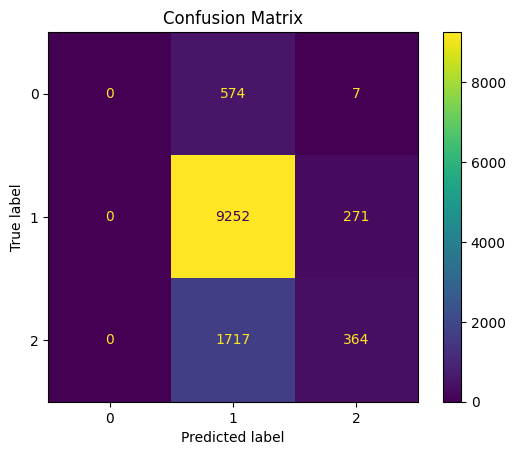

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


ACCURACCY, PRECISON, RECALL F1-SCORE (BAR CHART)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


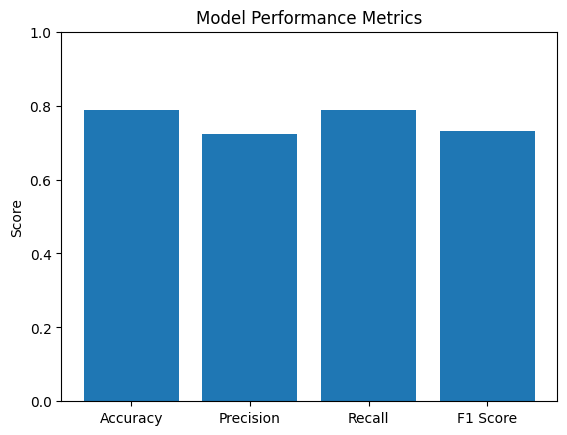

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure()
plt.bar(labels, metrics)
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()

FEATURE IMPORTANCE (LOGISTIC REGRESSION)

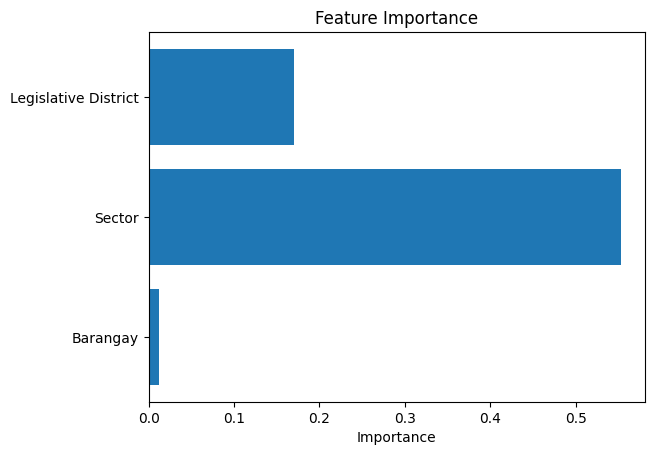

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define feature names based on the columns used for X
feature_names = ['Barangay', 'Sector', 'Legislative District']
importance = np.abs(model.coef_[0])

plt.figure()
plt.barh(feature_names, importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

ROC CURVE (BINARY CLASSFICATION)

/tmp/ipython-input-4021281724.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('jet', n_classes) # Use a colormap for different classes


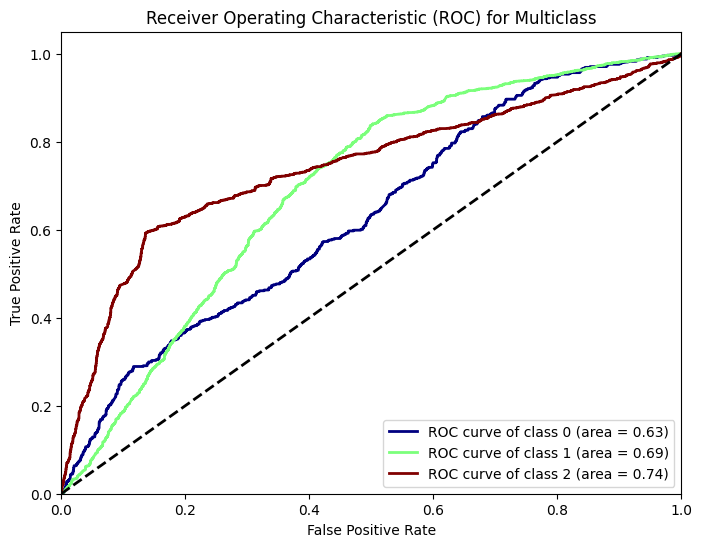

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get the probabilities for all classes
y_prob = model.predict_proba(X_test)

# Get the unique classes from y_test
classes = np.unique(y_test)
n_classes = len(classes)

# Binarize y_test for one-vs-rest plotting
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

plt.figure(figsize=(8, 6))
colors = plt.cm.get_cmap('jet', n_classes) # Use a colormap for different classes
lw = 2 # Line width

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw) # Diagonal random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multiclass')
plt.legend(loc="lower right")
plt.show()